In [79]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [80]:
def extract_number(filename):
    match = re.search(r"(\d+)", filename)
    if match:
        return int(match.group(1))
    else:
        return None

In [81]:
def missing_data(folder_path:str) -> list:
    """Freq"""
    file_list = glob.glob(f"{folder_path}/*.txt")

    results = []

    for file in file_list:
        file_name = os.path.basename(file)
        number=extract_number(file_name)
        results.append({'File Name': number})

    output=pd.DataFrame(results)
    output.head()

    full_set = set(range(1, 3181))

    # Step 2: Get the set of integers present in the DataFrame
    present_values = set(output['File Name'])

    # Step 3: Find the missing integers by subtracting the present set from the full set
    missing_values = full_set - present_values

    # Step 4: Convert the missing values to a sorted list (if needed)
    missing_values = sorted(list(missing_values))

    # Print or save the missing values
    return ("Missing values:", missing_values)

In [82]:
def read_deformation_data(folder_path):
    
    file_list = glob.glob(f"{folder_path}/*.txt")

    results = []

    for file_name in file_list:
        df = pd.read_csv(file_name,delimiter='\t')
        max_deformation_row = df.loc[df['Total Deformation (mm)'].idxmax()]
        file_name = os.path.basename(file_name)
        max_deformation = max_deformation_row['Total Deformation (mm)']
        x_location = max_deformation_row['X Location (mm)']
        y_location = max_deformation_row['Y Location (mm)']
        z_location = max_deformation_row['Z Location (mm)']

        number = extract_number(file_name)

        results.append({
            'File Name': number,
            'Max Deformation': max_deformation,
            'X': x_location,
            'Y': y_location,
            'Z': z_location
        })

    deformation_data=pd.DataFrame(results)
    return deformation_data

In [83]:
def read_frequency_data(folder_path):
    file_list = glob.glob(f"{folder_path}/*.txt")

    results = []

    for file in file_list:
        current_file=open(file,'r')
        content = current_file.read()
        

        # Assuming the numeric value is always in the format "x.xxxx [Hz]"
        if '.' in content:
            match = re.search(r"(\d+\.\d+)", content)
        else:
            match = re.search(r"(\d+)", content)
        file_name = os.path.basename(file)
        number=extract_number(file_name)
        freq=float(match.group(1))
        results.append({'File Name': number,'Frequency':freq})
        current_file.close()
        
    #print(results)
    frequency_data=pd.DataFrame(results)
    return frequency_data


In [84]:
def read_stress_data(folder_path):
    file_list = glob.glob(folder_path+'/**/*.txt', recursive=True)

    results = []

    for file_name in file_list:
        df = pd.read_csv(file_name,delimiter='\t')
        df.drop({"S (mm)","X Coordinate (mm)","Y Coordinate (mm)","Z Coordinate (mm)"},inplace=True,axis=1)
        stress_04t = df.loc[0, 'Maximum Principal Stress (MPa)']
        stress_1t = df.loc[1, 'Maximum Principal Stress (MPa)']
        stress_hs = 1.67 * stress_04t - 0.67 * stress_1t
        number = extract_number(file_name)
        #print(number)
        
        results.append({
            'File Name': number,
            'HotSpotStress':stress_hs
        })
        
    all_results=pd.DataFrame(results)
    max_values = all_results.groupby('File Name')['HotSpotStress'].max().round(3)
    output=max_values.to_frame()
    output.reset_index(inplace=True)
    stress_data=output
    return stress_data

In [85]:
"""folder = 'd:/'
output_list=[]
for support in os.listdir(folder):
    if support.startswith('Pinned') or support.startswith('Fixed'):
        #print(support)
        support_folder = os.path.join(folder,support)
        for result_type in os.listdir(support_folder):
            pd_name = support+'_'+result_type
            #print(pd_name)
            #print(result_type)
            result_type_folder = os.path.join(support_folder,result_type)
            output_list.append([result_type,pd_name,result_type_folder])
            """
            
"""
            if result_type.startswith('def'):
                print('1')
                print(result_type_folder)
                pd_name=read_deformation_data(result_type_folder)
                print(pd_name)
            
            if result_type.startswith('freq'):
                pd_name=read_frequency_data(result_type_folder)
                print(pd_name)
            
            if result_type.startswith('test'):
                pd_name=read_stress_data(result_type_folder)
                print(pd_name)
            """

"\n            if result_type.startswith('def'):\n                print('1')\n                print(result_type_folder)\n                pd_name=read_deformation_data(result_type_folder)\n                print(pd_name)\n            \n            if result_type.startswith('freq'):\n                pd_name=read_frequency_data(result_type_folder)\n                print(pd_name)\n            \n            if result_type.startswith('test'):\n                pd_name=read_stress_data(result_type_folder)\n                print(pd_name)\n            "

In [86]:
"""for i in output_list:
    result_type,pd_name,result_type_folder=i
    if result_type.startswith('def'):
        #print('1')
        #print(result_type_folder)
        df=read_deformation_data(result_type_folder)
        df.to_csv(pd_name+'.csv', index=False)"""

"for i in output_list:\n    result_type,pd_name,result_type_folder=i\n    if result_type.startswith('def'):\n        #print('1')\n        #print(result_type_folder)\n        df=read_deformation_data(result_type_folder)\n        df.to_csv(pd_name+'.csv', index=False)"

In [87]:
"""for i in output_list:
    result_type,pd_name,result_type_folder=i
    if result_type.startswith('freq'):
        df=read_frequency_data(result_type_folder)
        df.to_csv(pd_name+'.csv', index=False)"""

"for i in output_list:\n    result_type,pd_name,result_type_folder=i\n    if result_type.startswith('freq'):\n        df=read_frequency_data(result_type_folder)\n        df.to_csv(pd_name+'.csv', index=False)"

In [88]:
"""for i in output_list:
    result_type,pd_name,result_type_folder=i
    if result_type.startswith('test'):
        df=read_stress_data(result_type_folder)
        df.to_csv(pd_name+'.csv', index=False)"""

"for i in output_list:\n    result_type,pd_name,result_type_folder=i\n    if result_type.startswith('test'):\n        df=read_stress_data(result_type_folder)\n        df.to_csv(pd_name+'.csv', index=False)"

In [89]:
#Fixed Fixed Combo Dataset
parameters_Fixed_Fixed=pd.read_csv('final.csv')
stress_Fixed_Fixed=pd.read_csv('Fixed_Fixed_test.csv')
frequency_Fixed_Fixed=pd.read_csv('Fixed_Fixed_freq.csv')
deformation_Fixed_Fixed=pd.read_csv('Fixed_Fixed_deformation.csv')

parameters_Fixed_Free=pd.read_csv('final.csv')
stress_Fixed_Free=pd.read_csv('Fixed_Free_test.csv')
frequency_Fixed_Free=pd.read_csv('Fixed_Free_freq.csv')
deformation_Fixed_Free=pd.read_csv('Fixed_Free_deformation.csv')

parameters_Pinned_Pinned=pd.read_csv('final.csv')
stress_Pinned_Pinned=pd.read_csv('Pinned_Pinned_test.csv')
frequency_Pinned_Pinned=pd.read_csv('Pinned_Pinned_freq.csv')
deformation_Pinned_Pinned=pd.read_csv('Pinned_Pinned_deformation.csv')

parameters_Pinned_Fixed=pd.read_csv('final.csv')
stress_Pinned_Fixed=pd.read_csv('Pinned_Fixed_test.csv')
frequency_Pinned_Fixed=pd.read_csv('Pinned_Fixed_freq.csv')
deformation_Pinned_Fixed=pd.read_csv('Pinned_Fixed_deformation.csv')

In [90]:
Fixed_Fixed=pd.merge(parameters_Fixed_Fixed,pd.merge(pd.merge(stress_Fixed_Fixed,frequency_Fixed_Fixed,on="File Name"),deformation_Fixed_Fixed,on="File Name"),left_on="new_col",right_on="File Name")
Fixed_Free=pd.merge(parameters_Fixed_Free,pd.merge(pd.merge(stress_Fixed_Free,frequency_Fixed_Free,on="File Name"),deformation_Fixed_Free,on="File Name"),left_on="new_col",right_on="File Name")
Pinned_Pinned=pd.merge(parameters_Pinned_Pinned,pd.merge(pd.merge(stress_Pinned_Pinned,frequency_Pinned_Pinned,on="File Name"),deformation_Pinned_Pinned,on="File Name"),left_on="new_col",right_on="File Name")
Pinned_Fixed=pd.merge(parameters_Pinned_Fixed,pd.merge(pd.merge(stress_Pinned_Fixed,frequency_Pinned_Fixed,on="File Name"),deformation_Pinned_Fixed,on="File Name"),left_on="new_col",right_on="File Name")

In [91]:
Fixed_Fixed["Support Right +x"] = "Fixed"
Fixed_Fixed["Support Left -x"] = "Fixed"
Fixed_Free["Support Right +x"] = "Fixed"
Fixed_Free["Support Left -x"] = "Free"
Pinned_Pinned["Support Right +x"] = "Pinned"
Pinned_Pinned["Support Left -x"] = "Pinned"
Pinned_Fixed["Support Right +x"] = "Pinned"
Pinned_Fixed["Support Left -x"] = "Fixed"

Fixed_Fixed["Support"] = "Fixed_Fixed"
Fixed_Free["Support"] = "Fixed_Free"
Pinned_Pinned["Support"] = "Pinned_Pinned"
Pinned_Fixed["Support"] = "Pinned_Fixed"


In [92]:
dataframes = [Fixed_Fixed, Fixed_Free, Pinned_Fixed, Pinned_Pinned]

# Concatenate DataFrames
all_data = pd.concat(dataframes, ignore_index=True)

In [93]:
all_data["Ratio"]=53/all_data["HotSpotStress"]

In [94]:
all_data["Allowable Deformation"]=all_data["Max Deformation"]*all_data["Ratio"]

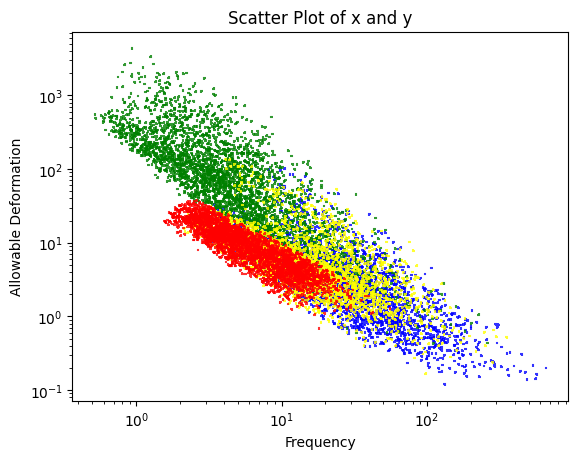

In [95]:
all_data.plot(x='Frequency', y='Allowable Deformation', kind='scatter',s=4,alpha=0.8,marker='+',c=all_data['Support'].map({'Fixed_Fixed': 'blue', 'Fixed_Free': 'green', 'Pinned_Pinned': 'red','Pinned_Fixed':'yellow'}))
plt.title('Scatter Plot of x and y')
#plt.xlim([0.5,1000])
#plt.ylim([0.1,10000])
plt.loglog()
plt.xlabel('Frequency')
plt.ylabel('Allowable Deformation')
plt.show()

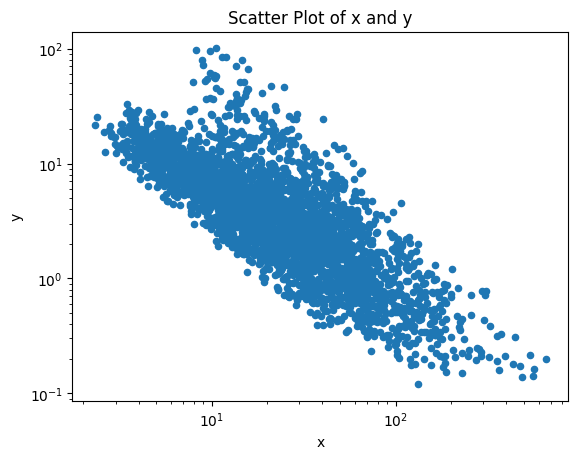

In [96]:
temp = all_data.loc[all_data['Support'] == "Fixed_Fixed"]
#print(temp)
temp.plot(x='Frequency', y='Allowable Deformation', kind='scatter')
plt.title('Scatter Plot of x and y')
#plt.xlim(right=100)
plt.loglog()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

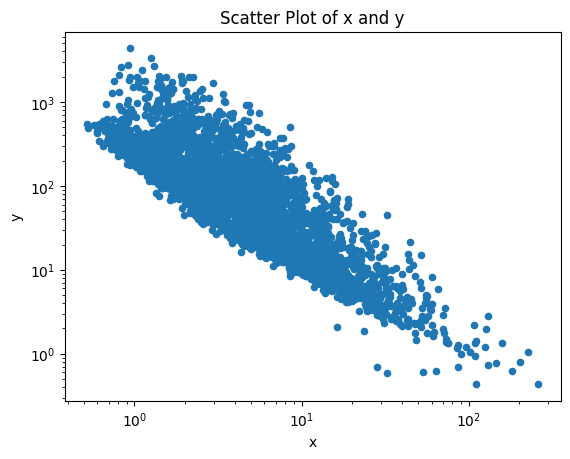

In [97]:
temp = all_data.loc[all_data['Support'] == "Fixed_Free"]
#print(temp)
temp.plot(x='Frequency', y='Allowable Deformation', kind='scatter')
plt.title('Scatter Plot of x and y')
#plt.xlim(right=100)
plt.loglog()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

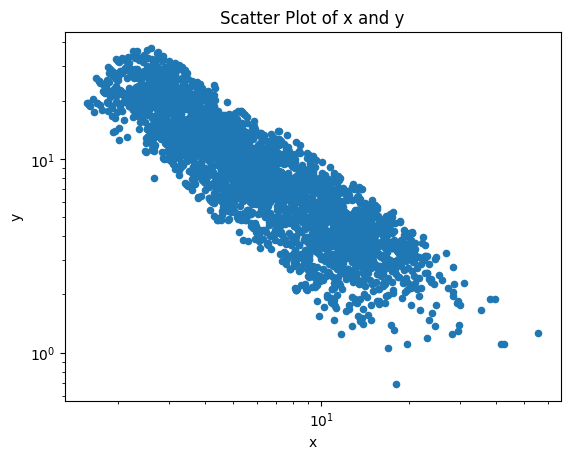

In [98]:
temp = all_data.loc[all_data['Support'] == "Pinned_Pinned"]
#print(temp)
temp.plot(x='Frequency', y='Allowable Deformation', kind='scatter')
plt.title('Scatter Plot of x and y')
#plt.xlim(right=100)
plt.loglog()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

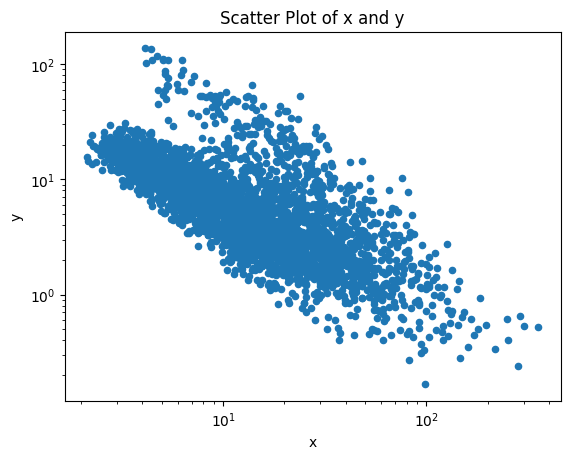

In [99]:
temp = all_data.loc[all_data['Support'] == "Pinned_Fixed"]
#print(temp)
temp.plot(x='Frequency', y='Allowable Deformation', kind='scatter')
plt.title('Scatter Plot of x and y')
#plt.xlim(right=100)
plt.loglog()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [100]:
all_data_export=all_data.round({'Ratio':3,'Allowable Deformation':3})
all_data_export.loc[all_data_export['Lumped Mass'] == 0.0001, 'Lumped Mass'] = 0
all_data_export.drop(labels=["File Name","new_col"],axis=1,inplace=True)
all_data_export.rename(columns={"Pipe DN": "pipe_dn", "Pipe Schedule": "pipe_schedule","Flange Class":"flange_class","Outside Diamter (mm)":"outside_diameter",
                        "Length1":"length1", "Length2":"length2", "Wall Thickness (mm)":"wall_thickness", "Lumped Mass":"lumped_mass",
                        "Raised Face Depth":"raised_face_depth", "W Neck C (mm)":"w_neck_c", "Flange Outer Radius":"flange_outer_radius",
                        "Flange Thickness D (mm)":"flange_thickness_d", "Raised Face Radius":"raised_face_radius", "HotSpotStress":"hot_spot_stress",
                        "Frequency":"frequency", "Max Deformation":"max_deformation", "X":"x_deformation_position",
                        "Y":"y_deformation_position","Z":"z_deformation_position", "Support Right +x":"support_right", "Support Left -x":"support_left",
                        "Support":"support", "Ratio":"ratio", "Allowable Deformation":"allowable_deformation"},inplace=True)

In [101]:
all_data_export.to_csv("all_data_results.csv",index=False)

In [102]:
drop_def=np.percentile(all_data_export["allowable_deformation"], 99)
drop_freq=np.percentile(all_data_export["frequency"], 99)

In [103]:
all_data_export_cleaned=all_data_export.drop(all_data_export[(all_data_export.allowable_deformation > drop_def)].index , inplace=False)
all_data_export_cleaned.drop(all_data_export_cleaned[(all_data_export_cleaned.frequency > drop_freq)].index , inplace=True)

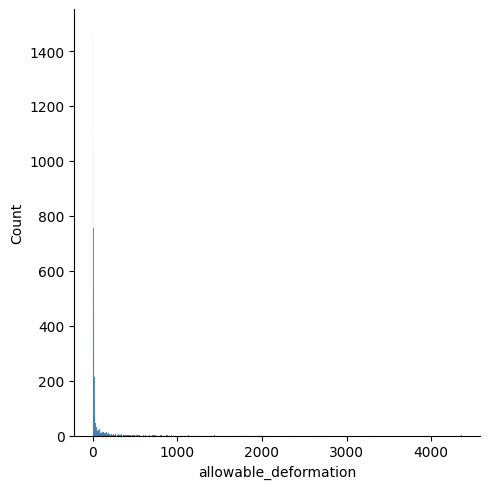

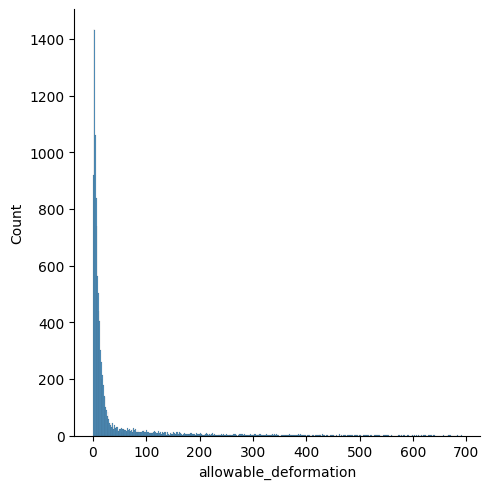

In [104]:
sns.displot(all_data_export["allowable_deformation"])
sns.displot(all_data_export_cleaned["allowable_deformation"])

In [105]:
all_data_export_cleaned.to_csv("all_data_results_cleaned.csv",index=False)

In [106]:
all_data_export_cleaned

,pipe_dn,pipe_schedule,flange_class,outside_diameter,length1,length2,wall_thickness,lumped_mass,raised_face_depth,w_neck_c,...,frequency,max_deformation,x_deformation_position,y_deformation_position,z_deformation_position,support_right,support_left,support,ratio,allowable_deformation
0,50,40,150,60.3,3064.0,3964.0,3.91,0.0,1.5,63.5,...,6.3338,7.529700,-408.36,0.00,30.150,Fixed,Fixed,Fixed_Fixed,1.694,12.756
1,50,40,150,60.3,4519.0,4102.0,3.91,0.0,1.5,63.5,...,4.2808,14.299000,243.13,0.00,30.150,Fixed,Fixed,Fixed_Fixed,1.290,18.440
2,50,40,150,60.3,4490.0,947.0,3.91,0.0,1.5,63.5,...,11.8597,1.209800,1725.90,16.97,21.279,Fixed,Fixed,Fixed_Fixed,21.345,25.823
3,50,40,150,60.3,4134.0,4184.0,3.91,0.0,1.5,63.5,...,4.5764,12.870000,-67.41,0.00,30.150,Fixed,Fixed,Fixed_Fixed,1.325,17.055
5,50,40,300,60.3,3551.0,1625.0,3.91,0.0,1.5,69.9,...,11.4934,2.355900,864.08,0.00,30.150,Fixed,Fixed,Fixed_Fixed,4.021,9.474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,400,XS,600,406.4,2710.0,1209.0,12.70,2090.0,6.4,177.8,...,10.4761,0.021504,-82.60,0.00,342.900,Pinned,Pinned,Pinned_Pinned,89.679,1.928
12716,400,XS,600,406.4,675.0,3372.0,12.70,2090.0,6.4,177.8,...,10.5111,0.022014,-674.64,0.00,203.200,Pinned,Pinned,Pinned_Pinned,90.444,1.991
12717,400,XS,600,406.4,3260.0,361.0,12.70,2090.0,6.4,177.8,...,12.8196,0.015051,382.34,0.00,203.200,Pinned,Pinned,Pinned_Pinned,91.537,1.378
12718,400,XS,600,406.4,3673.0,4155.0,12.70,2090.0,6.4,177.8,...,9.0426,0.027734,-399.16,0.00,203.200,Pinned,Pinned,Pinned_Pinned,89.831,2.491


C:\Users\austi\AppData\Local\Temp\ipykernel_1784\1987238745.py:12: RuntimeWarning: divide by zero encountered in divide
  y=((250/x)**0.5)*0.0254*10
C:\Users\austi\AppData\Local\Temp\ipykernel_1784\1987238745.py:15: RuntimeWarning: divide by zero encountered in divide
  y=((250/x)**0.5)*0.0254*4


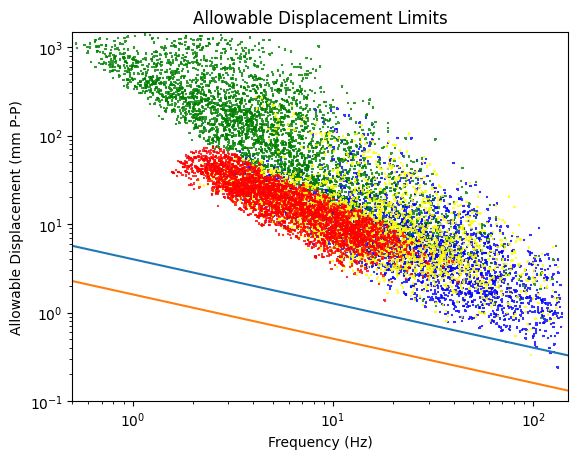

In [107]:
x=all_data_export_cleaned['frequency']
y=all_data_export_cleaned['allowable_deformation']*2
plt.scatter(x,y, s=3,alpha=0.8,marker='+',c=all_data_export_cleaned['support'].map({'Fixed_Fixed': 'blue', 'Fixed_Free': 'green', 'Pinned_Pinned': 'red','Pinned_Fixed':'yellow'}))
plt.title('Allowable Displacement Limits')
#plt.xlim([0.1,200])
plt.ylim([0.1,1500])
plt.xlim([0.5,150])
plt.loglog()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Allowable Displacement (mm P-P)')
x=np.linspace(0,200,10000)
y=((250/x)**0.5)*0.0254*10
plt.plot(x,y)
x=np.linspace(0,200,10000)
y=((250/x)**0.5)*0.0254*4
plt.plot(x,y)
plt.show()
#plt.xlim(0.1,200)

C:\Users\austi\AppData\Local\Temp\ipykernel_1784\1347182861.py:17: RuntimeWarning: divide by zero encountered in divide
  y=((250/x)**0.5)*0.0254*10*2*np.pi*x/(2**0.5)
C:\Users\austi\AppData\Local\Temp\ipykernel_1784\1347182861.py:17: RuntimeWarning: invalid value encountered in multiply
  y=((250/x)**0.5)*0.0254*10*2*np.pi*x/(2**0.5)
C:\Users\austi\AppData\Local\Temp\ipykernel_1784\1347182861.py:19: RuntimeWarning: divide by zero encountered in divide
  y=((250/x)**0.5)*0.0254*4*2*np.pi*x/(2**0.5)
C:\Users\austi\AppData\Local\Temp\ipykernel_1784\1347182861.py:19: RuntimeWarning: invalid value encountered in multiply
  y=((250/x)**0.5)*0.0254*4*2*np.pi*x/(2**0.5)
C:\Users\austi\AppData\Local\Temp\ipykernel_1784\1347182861.py:21: RuntimeWarning: divide by zero encountered in log
  y=10**((np.log(x)+0.48017)/(2.127612))
C:\Users\austi\AppData\Local\Temp\ipykernel_1784\1347182861.py:23: RuntimeWarning: divide by zero encountered in log
  y=10**((np.log(x)+1.871083)/(2.084547))


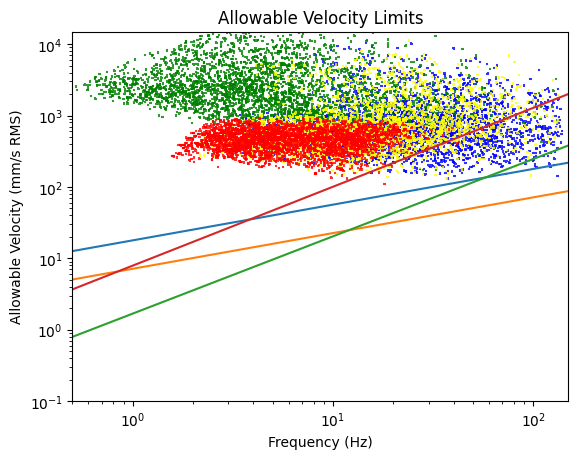

In [108]:
x=all_data_export_cleaned['frequency']
displacement_0P = all_data_export_cleaned['allowable_deformation']
displacement_PP = displacement_0P*2
velocity_PP = displacement_PP*all_data_export_cleaned['frequency']*2*np.pi
velocity_rms = velocity_PP/(2)**0.5

y=velocity_rms
plt.scatter(x,y, s=3,alpha=0.8,marker='+',c=all_data_export_cleaned['support'].map({'Fixed_Fixed': 'blue', 'Fixed_Free': 'green', 'Pinned_Pinned': 'red','Pinned_Fixed':'yellow'}))
plt.title('Allowable Velocity Limits')

plt.ylim([0.1,15000])
plt.xlim([0.5,150])
plt.loglog()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Allowable Velocity (mm/s RMS)')
x=np.linspace(0,200,10000)
y=((250/x)**0.5)*0.0254*10*2*np.pi*x/(2**0.5)
plt.plot(x,y)
y=((250/x)**0.5)*0.0254*4*2*np.pi*x/(2**0.5)
plt.plot(x,y)
y=10**((np.log(x)+0.48017)/(2.127612))
plt.plot(x,y)
y=10**((np.log(x)+1.871083)/(2.084547))
plt.plot(x,y)
plt.show()
#plt.xlim(0.1,200)